__Resources__<br>
I will be using numpy pandas matplotlib and citipy packages and the open weather wrapper

In [59]:
#import dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests as req
import json
import time
import os
import bokeh
from config import opwther_key
sample_out = "SampleCoords.csv"
import datetime


now = datetime.date.today()

data_file = "sample_data"


In [60]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = opwther_key
settings = {"units": "imperial", "appid":opwther_key}
query_url = f"{url}appid={opwther_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=


__ Gathering Random City Samples__<br>
I will accomplish this by retreiving a city list from citipy by iterating through latitude and longitude<br>
values and retreiving city names where there are matches using the citipy nearest_city function.<br>
This will create duplicates that will be removed before sampling. <br>
The latitude and longitude values will include the entire globe.<br>
I chose to sample the globe in quadrants seperately to ensure even distriubtion of samples<br>
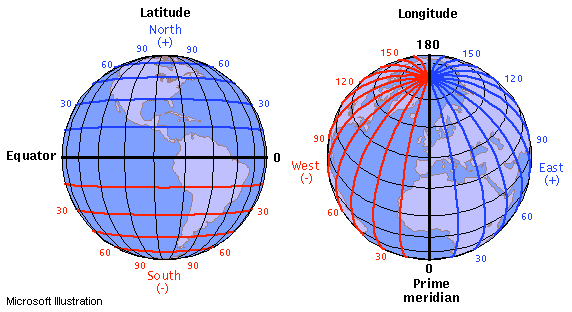<br>
Image source = http://learner.org/jnorth/tm/LongitudeIntro.html

In [61]:
#create empty list
north_citylist = []

count = 0
dup = 'no'
#cycle through lat long values
for x in range(0,45,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
         #insert first value
        if len(north_citylist) == 0:
            north_citylist.append(citdict)
            count+=1
            continue
        else:
                 #skip record if city is already in dictionary
            for city in north_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            north_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
north_df = pd.DataFrame({
    'city': [x['city'] for x in north_citylist],
    'country': [x['country'] for x in north_citylist],
    'lat':[x['lat'] for x in north_citylist],
    'long':[x['long'] for x in north_citylist]})

#sample south values for 250 samples
north_sample_df= north_df.sample(125)


In [62]:
#create empty list
north2_citylist = []

count = 0
dup = 'no'
#cycle through lat long values
for x in range(46,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
         #insert first value
        if len(north_citylist) == 0:
            north_citylist.append(citdict)
            count+=1
            continue
        else:
                 #skip record if city is already in dictionary
            for city in north_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            north_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
north2_df = pd.DataFrame({
    'city': [x['city'] for x in north_citylist],
    'country': [x['country'] for x in north_citylist],
    'lat':[x['lat'] for x in north_citylist],
    'long':[x['long'] for x in north_citylist]})

#sample south values for 250 samples
north2_sample_df= north2_df.sample(125)

In [67]:
#create empty list
south_citylist =[]
count = 0
dup = 'no'
#cycle through lat long values
for x in range(-90,-1,1):
    for y in range(-180,180,1):
        # call nearest_city function from city py and append results to dictionary
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        #insert first value
        if len(south_citylist) == 0:
            south_citylist.append(citdict)
            count+=1
            continue
        #skip record if city is already in dictionary
        else:
            for city in south_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            south_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
south_df = pd.DataFrame({
    'city': [x['city'] for x in south_citylist],
    'country': [x['country'] for x in south_citylist],
    'lat':[x['lat'] for x in south_citylist],
    'long':[x['long'] for x in south_citylist]})

#sample south values for 250 samples
south_sample_df= south_df.sample(250)


In [52]:
#append both samples to common dataframe
city_sample_df=south_sample_df
city_sample_df=city_sample_df.append(north_sample_df)
city_sample_df=city_sample_df.append(north2_sample_df)

city_sample_df.head()
#check results
print(len(city_sample_df))



500


In [53]:
city_sample_df.head()

,city,country,lat,long
205,goulburn,au,-35,150
638,tsienyane,bw,-22,24
464,francisco beltrao,br,-26,-53
453,bongaree,au,-27,154
1681,mushie,cd,-3,17


In [7]:
#Validate Sampling moethods
print("Northern Hemisphere City Totals : " + str(len(north_df)))
print("Southern Hemisphere City Totals : " + str(len(south_df)))

Northern Hemisphere City Totals : 6273
Southern Hemisphere City Totals : 1814


__ Key Differences In City Counts__<br>
There are significantly more cities in the northern hemisphere<br>
This validates my sampling method of splitting and joining the samples.<br>




In [54]:
count = 0
weather_json = []

for index,row in city_sample_df.iterrows():
    count+= 1
    query_url = url + "appid=" + opwther_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        weather_json.append(cityweather)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
    except:
        #print(f"No data for this city: {row['city']}")
        print(f"Processing Record {count} for {row['city']} , {row['country']}")

        print(query_url)

print("                Data Retrieval Complete")


Processing Record 1 for goulburn , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=goulburn
Processing Record 2 for tsienyane , bw
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=tsienyane
Processing Record 3 for francisco beltrao , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=francisco beltrao
Processing Record 4 for bongaree , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bongaree
Processing Record 5 for mushie , cd
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=mushie
Processing Record 6 for puerto madryn , ar
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=puerto madryn
Processing Record 7 for usevya , tz
http://api.openweathermap.org/data/2.5

Processing Record 56 for antsohihy , mg
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=antsohihy
Processing Record 57 for barra do garcas , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=barra do garcas
Processing Record 58 for tunduru , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=tunduru
Processing Record 59 for uaua , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=uaua
Processing Record 60 for tarauaca , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=tarauaca
Processing Record 61 for betanzos , bo
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=betanzos
Processing Record 62 for umarizal , br
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 110 for lima , py
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=lima
Processing Record 111 for kruisfontein , za
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kruisfontein
Processing Record 112 for guajara-mirim , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=guajara-mirim
Processing Record 113 for matadi , cd
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=matadi
Processing Record 114 for manggar , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=manggar
Processing Record 115 for camargo , bo
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=camargo
Processing Record 116 for norsup , vu
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 164 for conchas , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=conchas
Processing Record 165 for kirakira , sb
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kirakira
Processing Record 166 for nosy varika , mg
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=nosy varika
Processing Record 167 for lubango , ao
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=lubango
Processing Record 168 for byron bay , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=byron bay
Processing Record 169 for nsunga , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=nsunga
Processing Record 170 for itapora , br
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 218 for bloemfontein , za
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bloemfontein
Processing Record 219 for vallenar , cl
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=vallenar
Processing Record 220 for ambon , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ambon
Processing Record 221 for campina grande do sul , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=campina grande do sul
Processing Record 222 for ruteng , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ruteng
Processing Record 223 for port hedland , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=port hedland
Processing Record 224 for vikindu , tz
http://api.openwe

Processing Record 272 for dalbandin , pk
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=dalbandin
Processing Record 273 for fiche , et
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=fiche
Processing Record 274 for dourbali , td
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=dourbali
Processing Record 275 for progreso , mx
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=progreso
Processing Record 276 for garh maharaja , pk
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=garh maharaja
Processing Record 277 for kafanchan , ng
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kafanchan
Processing Record 278 for taybad , ir
http://api.openweathermap.org/data/2.5/wea

Processing Record 326 for rupert , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=rupert
Processing Record 327 for chaiyaphum , th
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=chaiyaphum
Processing Record 328 for saint pete beach , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=saint pete beach
Processing Record 329 for biltine , td
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=biltine
Processing Record 330 for boysun , uz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=boysun
Processing Record 331 for gallipoli , it
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=gallipoli
Processing Record 332 for cabra , ph
http://api.openweathermap.org/data/2.5/

Processing Record 380 for jeremie , ht
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=jeremie
Processing Record 381 for taburi , ph
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=taburi
Processing Record 382 for ewa beach , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ewa beach
Processing Record 383 for izumo , jp
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=izumo
Processing Record 384 for kalavrita , gr
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kalavrita
Processing Record 385 for sasaram , in
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=sasaram
Processing Record 386 for liverpool , ca
http://api.openweathermap.org/data/2.5/weather?appid=f5b7

Processing Record 435 for lemesos , cy
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=lemesos
Processing Record 436 for amantea , it
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=amantea
Processing Record 437 for namie , jp
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=namie
Processing Record 438 for killini , gr
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=killini
Processing Record 439 for aporawan , ph
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=aporawan
Processing Record 440 for gasa , bt
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=gasa
Processing Record 441 for paradise valley , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d7

Processing Record 490 for kadambur , in
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kadambur
Processing Record 491 for bam , ir
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bam
Processing Record 492 for tomatlan , mx
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=tomatlan
Processing Record 493 for santa teresa , ph
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=santa teresa
Processing Record 494 for seydisehir , tr
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=seydisehir
Processing Record 495 for karhal , in
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=karhal
Processing Record 496 for sann , pk
http://api.openweathermap.org/data/2.5/weather?appid=f

In [55]:

latitude  = []
longtitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city = []
country = []
max_temp = []


for data in weather_json:
    try:

        lat1 = data.get("coord").get("lat")
        latitude.append(lat1)
        temp1 = data.get("main").get("temp")
        temperature.append(temp1)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        humi1 = data.get("main").get("humidity")
        humidity.append(humi1)
        cld1 = data.get("clouds").get("all")
        cloudiness.append(cld1)
        wind1 = data.get("wind").get("speed")
        wind_speed.append(wind1)
        long1 = data.get("coord").get("lon")
        longtitude.append(long1)
        temp1 = data.get("main").get("temp_max")
        max_temp.append(temp1)
        
    except:
        pass

    continue

weather_dict = {"city":city, "Temperature (F)": temperature, "Latitude": latitude, "Longitude":longtitude, "Country":country,
                "Humidity": humidity, "Cloudiness":cloudiness,"Wind_Speed":wind_speed, "Max_Temp":max_temp}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(data_file+'_'+str(now)+'.csv', sep='\t')


weather_df.head()


,city,Temperature (F),Latitude,Longitude,Country,Humidity,Cloudiness,Wind_Speed,Max_Temp
0,Goulburn,50.15,-34.75,149.72,AU,80,0,9.24,50.15
1,Francisco Beltrao,64.19,-26.08,-53.05,BR,69,0,5.03,64.19
2,Bongaree,59.00,-27.08,153.16,AU,38,0,12.75,59.00
3,Mushie,71.66,-3.02,16.92,CD,100,68,2.35,71.66
4,Puerto Madryn,48.35,-42.77,-65.04,AR,100,64,18.68,48.35


In [10]:
#check for sample totals
len(weather_df)

459

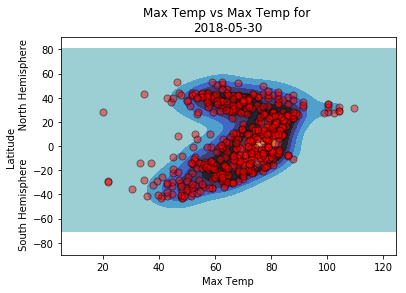

In [56]:
sns.kdeplot(weather_df.Max_Temp,weather_df.Latitude,{'axes.grid': True},cmap="icefire")
plt.scatter(weather_df.Max_Temp,weather_df.Latitude,facecolors="red",s=50, edgecolors="black",alpha=0.45)

plt.title("Max Temp vs Max Temp for \n"+str(now))
plt.xlabel("Max Temp")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')
plt.ylim((-90,90))


plt.savefig("Latitude V Max Temp"+'_'+str(now)+'.png')

__ Temperature V Latitude__<br>
Density and scatter plot combined in the above plot shows a clear relationship.<br>
Temperatures nearer the equator are warmer.<br>
This relationship will be expected to fluctuate.<br>



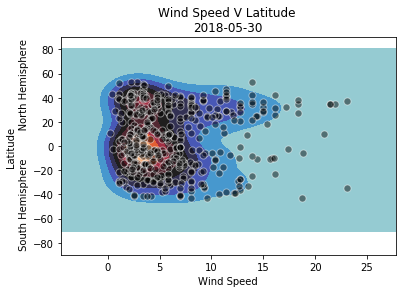

In [57]:
sns.kdeplot(weather_df.Wind_Speed,weather_df.Latitude,{'axes.grid': True},cmap="icefire")
plt.scatter(weather_df.Wind_Speed,weather_df.Latitude,facecolors="black", edgecolors="white",s=50,alpha=0.45)

plt.title("Wind Speed V Latitude \n"+str(now))
plt.xlabel("Wind Speed")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))


plt.savefig("Wind Speed V Latitude"+'_'+str(now)+'.png')

__Wind Speed V Latitude__


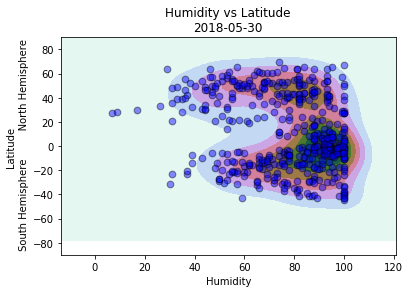

In [47]:
sns.kdeplot(weather_df.Humidity,weather_df.Latitude,{'axes.grid': True},cmap="cubehelix_r")
plt.scatter(weather_df.Humidity,weather_df.Latitude, facecolors="blue",s=45, edgecolors="black",alpha=0.45)

plt.title("Humidity vs Latitude\n"+str(now))
plt.xlabel("Humidity")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))



plt.savefig("Humidity V Latitude"+'_'+str(now)+'.png')

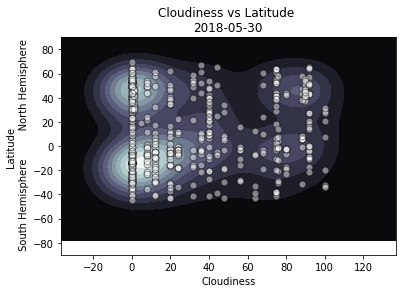

In [48]:
plt.title("Cloudiness vs Latitude \n"+str(now))
sns.kdeplot(weather_df.Cloudiness,weather_df.Latitude,{'axes.grid': True},cmap="bone")
plt.scatter(weather_df.Cloudiness,weather_df.Latitude, facecolors="White",s=45, edgecolors="black",alpha=0.45)

plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))

plt.savefig("Cloudiness vs Latitude"+'_'+str(now)+'.png')
